In [1]:
import os
files = os.listdir('./drive/MyDrive/공시지가')
files

['공시지가_1990년.csv',
 '공시지가_1991년.csv',
 '공시지가_1992년.csv',
 '공시지가_1993년.csv',
 '공시지가_1994년.csv',
 '공시지가_1995년.csv',
 '공시지가_1997년.csv',
 '공시지가_1996년.csv',
 '공시지가_1998년.csv',
 '공시지가_1999년.csv',
 '공시지가_2000년.csv',
 '공시지가_2001년.csv',
 '공시지가_2002년.csv',
 '공시지가_2003년.csv',
 '공시지가_2005년.csv',
 '공시지가_2004년.csv',
 '공시지가_2006년.csv',
 '공시지가_2007년.csv',
 '공시지가_2008년.csv',
 '공시지가_2009년.csv',
 '공시지가_2010년.csv',
 '공시지가_2011년.csv',
 '공시지가_2012년.csv',
 '공시지가_2013년.csv',
 '공시지가_2014년.csv',
 '공시지가_2015년.csv',
 '공시지가_2016년.csv',
 '공시지가_2017년.csv',
 '공시지가_2018년.csv',
 '공시지가_2019년.csv',
 '공시지가_2020년.csv',
 '공시지가_2021년.csv',
 '공시지가_2022년.csv']

In [2]:
import pandas as pd
result = pd.DataFrame(columns = ['시군구명', '법정동명', '공시지가(원/㎡)', '기준년월'])

In [3]:
for i in files:
     test = pd.read_csv(f'./drive/MyDrive/공시지가/{i}', encoding='cp949')
     test = test[['시군구명', '법정동명', '공시지가(원/㎡)', '기준년월']]
     result = pd.concat([result, test], ignore_index=True)
result

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,시군구명,법정동명,공시지가(원/㎡),기준년월
0,성북구,하월곡동,640000,1990-01-01
1,강북구,수유동,1000000,1990-01-01
2,강북구,수유동,1100000,1990-01-01
3,강북구,수유동,1100000,1990-01-01
4,강북구,수유동,1200000,1990-01-01
...,...,...,...,...
31289562,성북구,종암동,3765000,2022-01-01
31289563,성북구,종암동,3485000,2022-01-01
31289564,성북구,종암동,6850000,2022-01-01
31289565,성북구,종암동,4125000,2022-01-01


In [4]:
result.to_csv('./drive/MyDrive/공시지가.csv', sep=',', na_rep='NaN')

In [5]:
df = result.copy()
df

,시군구명,법정동명,공시지가(원/㎡),기준년월
0,성북구,하월곡동,640000,1990-01-01
1,강북구,수유동,1000000,1990-01-01
2,강북구,수유동,1100000,1990-01-01
3,강북구,수유동,1100000,1990-01-01
4,강북구,수유동,1200000,1990-01-01
...,...,...,...,...
31289562,성북구,종암동,3765000,2022-01-01
31289563,성북구,종암동,3485000,2022-01-01
31289564,성북구,종암동,6850000,2022-01-01
31289565,성북구,종암동,4125000,2022-01-01


In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import folium

In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [8]:
plt.rc('font', family='NanumBarunGothic') 

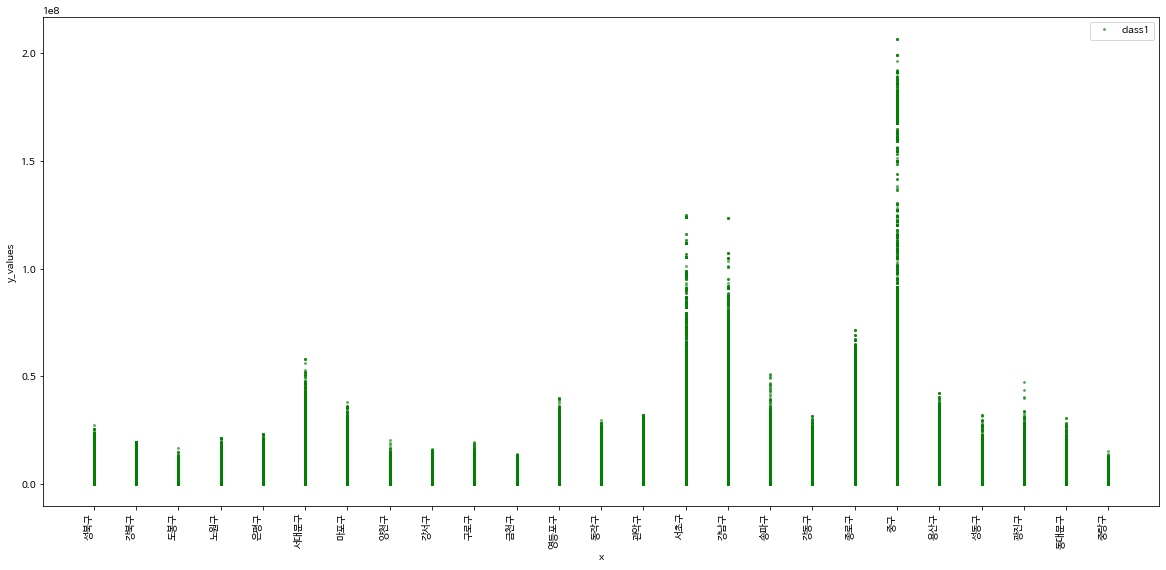

In [9]:
fig = plt.figure(figsize=(20,10))
X = df

plt.plot(  X.iloc[:,0]
         , X.iloc[:,2]
         , 'o'
         , markersize=2
         , color='green'
         , alpha=0.5
         , label='class1'
        )

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlabel('x', fontsize=10)
fig.autofmt_xdate(rotation=90)

plt.legend()
plt.show()

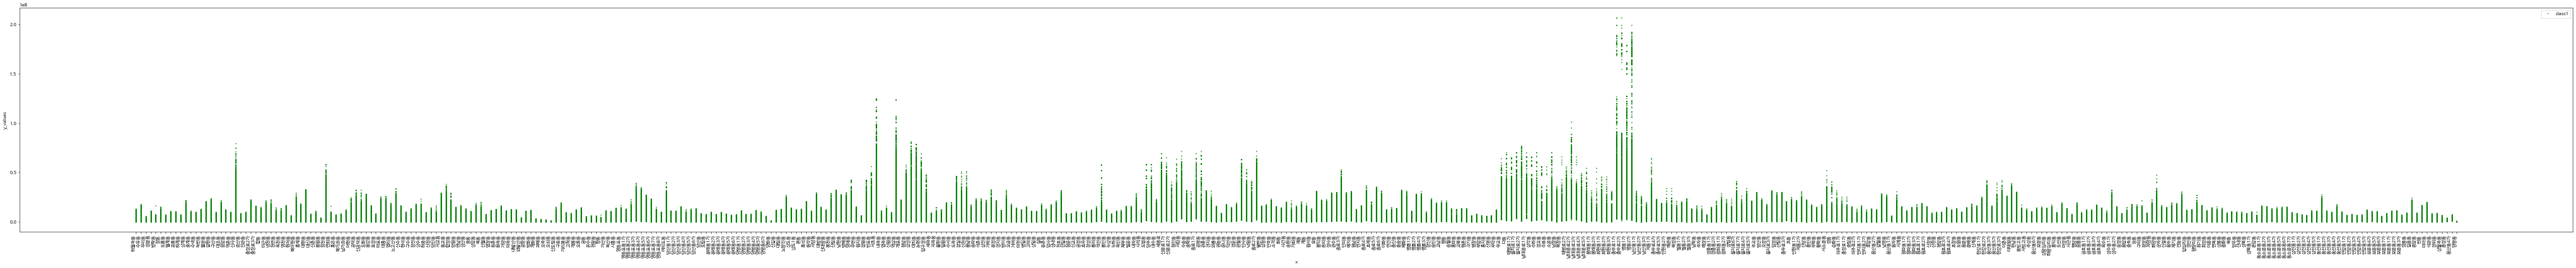

In [10]:
fig = plt.figure(figsize=(100,10))
X = df

plt.plot(  X.iloc[:,1]
         , X.iloc[:,2]
         , 'o'
         , markersize=2
         , color='green'
         , alpha=0.5
         , label='class1'
        )

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlabel('x', fontsize=10)
fig.autofmt_xdate(rotation=90)

plt.legend()
plt.show()

In [11]:
data = df.groupby(["시군구명"])["공시지가(원/㎡)"].mean()
pd.reset_option('display.float_format')
data

시군구명
강남구     4.561986e+06
강동구     2.068703e+06
강북구     1.346064e+06
강서구     1.376864e+06
관악구     1.916916e+06
광진구     2.101782e+06
구로구     1.542922e+06
금천구     1.573658e+06
노원구     1.298109e+06
도봉구     1.241123e+06
동대문구    1.982352e+06
동작구     1.911777e+06
마포구     2.130383e+06
서대문구    1.954508e+06
서초구     3.134834e+06
성동구     1.988810e+06
성북구     1.599229e+06
송파구     2.672601e+06
양천구     1.714912e+06
영등포구    2.108936e+06
용산구     3.001621e+06
은평구     1.582275e+06
종로구     3.252322e+06
중구      5.127314e+06
중랑구     1.495946e+06
Name: 공시지가(원/㎡), dtype: float64

In [1]:
raw_data = []
for i in range(data.size):
  raw_data.append([data.index[i], data[data.index[i]]])
raw_data

NameError: name 'data' is not defined

In [13]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

data = pd.DataFrame(raw_data, columns = ['name', 'value'])

m = folium.Map(
    location=[37.566345, 126.977893],
    tiles='cartodbpositron',
)

folium.Choropleth(
    geo_data = geo_json,
    name='choropleth',
    data=data,
    columns=['name', 'value'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m